In [44]:
!pip install pandas_datareader

#load the packages
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web


In [29]:
style.use('ggplot')
# we are taking start and end data
start = dt.datetime(2019, 12, 12)
end = dt.datetime.now()
#pandas_datareader package, looks for the stock ticker TSLA(Tesla), gets the information from yahoo
df = web.DataReader("TSLA", 'yahoo', start, end)
#print(df.head(6))
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)


print(df.head())

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2019-12-12  72.547997  70.646004  70.984001  71.935997  38819500.0  71.935997
2019-12-13  73.042000  70.928001  72.209999  71.678001  32854500.0  71.678001
2019-12-16  76.722000  72.500000  72.510002  76.300003  90871000.0  76.300003
2019-12-17  77.099998  75.180000  75.797997  75.797997  42484000.0  75.797997
2019-12-18  79.043999  76.115997  76.125999  78.629997  70605000.0  78.629997


In [30]:
# we can save the data into csv file
df.to_csv('TESLA.csv')

In [31]:
#here instead of reading directly from finance API to dataframe, we can read from csv file
df = pd.read_csv('tesla.csv', parse_dates=True, index_col=0)

In [32]:
# here we are resampling data into 7 days data , so that it shrinks the data significantly as we have daily data
df_ohlc = df['Adj Close'].resample('7D').ohlc()

In [33]:
# here we are resampling the volume data
df_volume = df['Volume'].resample('7D').sum()

In [34]:
# it prints the top 5 records of week data
print(df_ohlc.head())

                 open        high        low       close
Date                                                    
2019-12-12  71.935997   78.629997  71.678001   78.629997
2019-12-19  80.807999   85.050003  80.807999   85.050003
2019-12-26  86.188004   86.188004  82.940002   83.666000
2020-01-02  86.052002   98.428001  86.052002   98.428001
2020-01-09  96.267998  107.584000  95.629997  103.699997


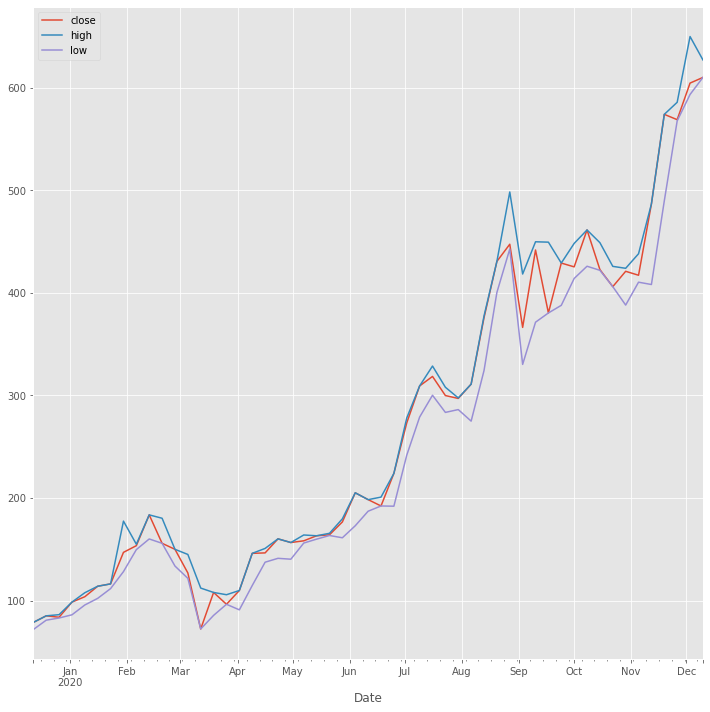

In [35]:
#It plots the 3 columns of week data of ohlc
df_ohlc[['close','high','low']].plot()
plt.show()

In [45]:
#converting the decimal type to integer type
df_ohlc['close'] = df_ohlc['close'].astype(int)

In [46]:
df_ohlc['close']

Date
2019-12-12     78
2019-12-19     85
2019-12-26     83
2020-01-02     98
2020-01-09    103
2020-01-16    113
2020-01-23    116
2020-01-30    146
2020-02-06    153
2020-02-13    183
2020-02-20    155
2020-02-27    149
2020-03-05    126
2020-03-12     72
2020-03-19    107
2020-03-26     96
2020-04-02    109
2020-04-09    145
2020-04-16    146
2020-04-23    160
2020-04-30    156
2020-05-07    158
2020-05-14    163
2020-05-21    164
2020-05-28    176
2020-06-04    205
2020-06-11    198
2020-06-18    192
2020-06-25    223
2020-07-02    273
2020-07-09    309
2020-07-16    318
2020-07-23    299
2020-07-30    297
2020-08-06    310
2020-08-13    375
2020-08-20    430
2020-08-27    447
2020-09-03    366
2020-09-10    441
2020-09-17    380
2020-09-24    429
2020-10-01    425
2020-10-08    461
2020-10-15    422
2020-10-22    406
2020-10-29    420
2020-11-05    417
2020-11-12    486
2020-11-19    574
2020-11-26    568
2020-12-03    604
2020-12-10    609
Freq: 7D, Name: close, dtype: int32

In [47]:
#it counts the duplicates of the column data
group = df_ohlc.pivot_table(index = ['close'], aggfunc ='size') 
group
  

close
72     1
78     1
83     1
85     1
96     1
98     1
103    1
107    1
109    1
113    1
116    1
126    1
145    1
146    2
149    1
153    1
155    1
156    1
158    1
160    1
163    1
164    1
176    1
183    1
192    1
198    1
205    1
223    1
273    1
297    1
299    1
309    1
310    1
318    1
366    1
375    1
380    1
406    1
417    1
420    1
422    1
425    1
429    1
430    1
441    1
447    1
461    1
486    1
568    1
574    1
604    1
609    1
dtype: int64

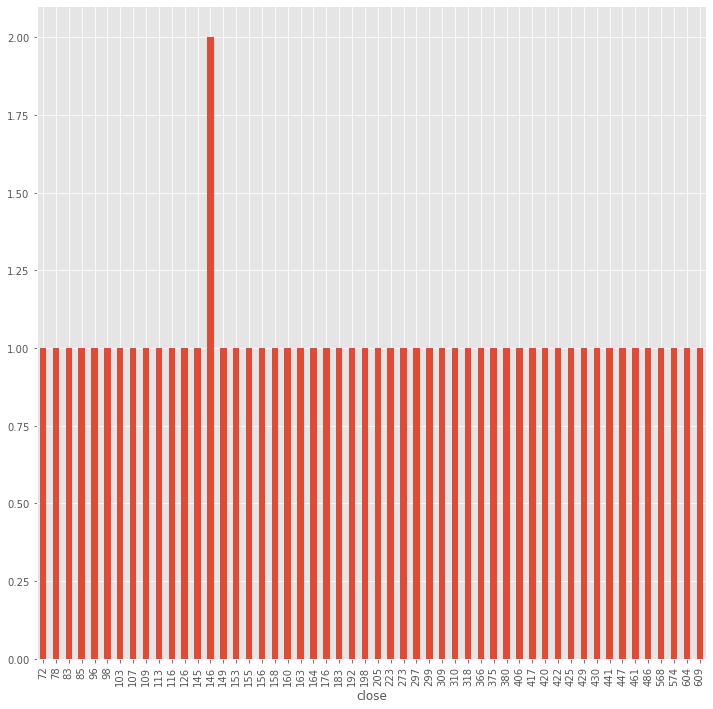

In [48]:
group.plot(kind="bar")